# Embeddings

In [20]:
from sentence_transformers import SentenceTransformer
import umap
import plotly.express as px
import json

In [2]:
encoder = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [3]:
my_sentences = ["Hello World!", "world War 2", "Love", "Man", "Woman", "King", 
                "Queen", "Cat", "Dog", "Mum", "City", "Cars", "Bike", "History", "Lamp", 
               "Bulbs", "Light"]

In [4]:
encoded_sentences = encoder.encode(my_sentences)

In [5]:
encoded_sentences.shape

(17, 384)

In [6]:
reducer = umap.UMAP()

In [7]:
reduced_encoded_sentences = reducer.fit_transform(encoded_sentences)

In [8]:
reduced_encoded_sentences

array([[-8.234795 , -3.6010017],
       [-7.9902883, -4.3058567],
       [-7.8957257, -2.5851583],
       [-8.405005 , -2.8209362],
       [-9.078301 , -2.4305043],
       [-8.774773 , -3.809068 ],
       [-8.927712 , -3.275334 ],
       [-7.529119 , -2.1037717],
       [-7.1950684, -2.6866643],
       [-8.537011 , -2.0592482],
       [-7.2745147, -4.0263953],
       [-8.581053 , -4.832817 ],
       [-9.6255455, -3.1922014],
       [-7.572573 , -3.4021158],
       [-9.402667 , -4.3356295],
       [-9.843526 , -4.6852255],
       [-9.896762 , -4.0730233]], dtype=float32)

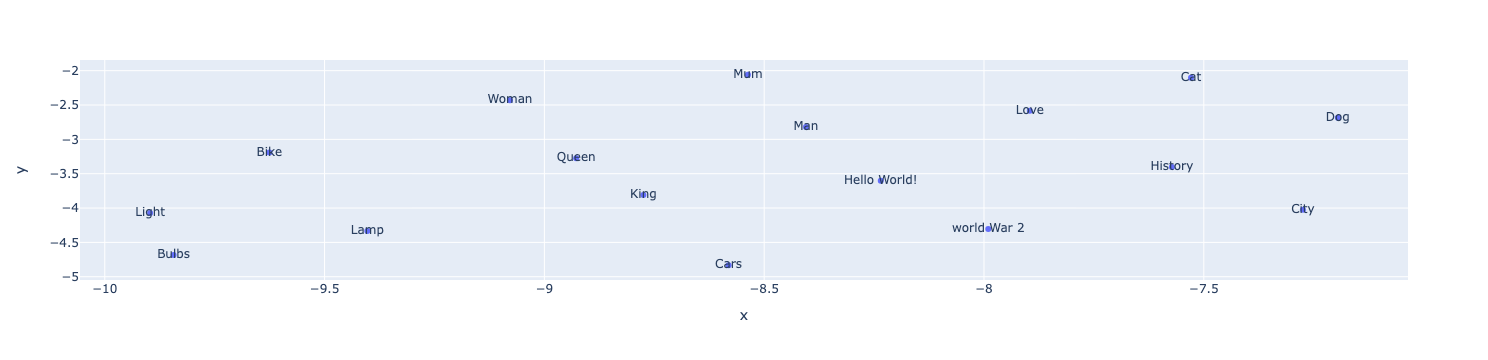

In [17]:
fig = px.scatter(x = reduced_encoded_sentences.T[0], y=reduced_encoded_sentences.T[1], text=my_sentences)
fig.show()

In [42]:
with open('../data/movie_data.json') as f:
    movies = json.load(f)

In [48]:
FIRST_N_MOVIES = 100

movies_overviews = [m['overview'] for m in movies[0:FIRST_N_MOVIES]]
movies_titles = [m['title'] for m in movies[0:FIRST_N_MOVIES]]

In [49]:
encoded_movies = encoder.encode(movies_overviews)

In [50]:
reducer = umap.UMAP()
reduced_encoded_movies = reducer.fit_transform(encoded_movies)

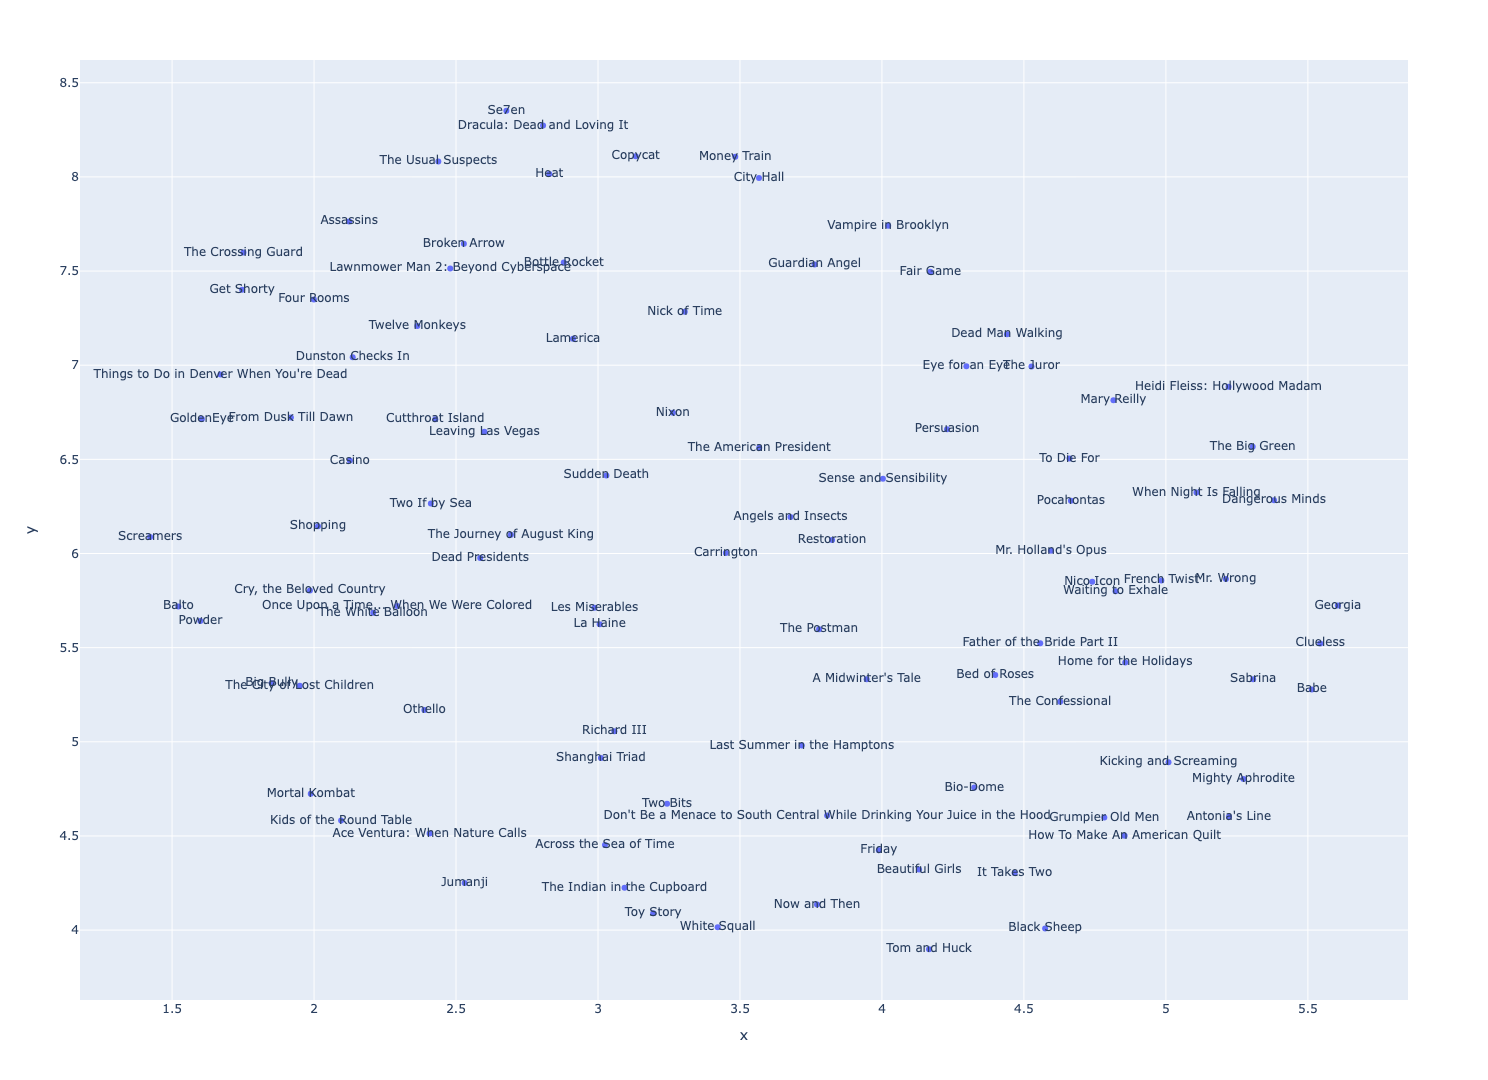

In [56]:
fig = px.scatter(x = reduced_encoded_movies.T[0], y=reduced_encoded_movies.T[1], text=movies_titles, height=1080)
fig.show()